# Mall Customer Segmentation and Forming Growth Strategy

#### By Sourabh Mahajan

### Dataset Overview

> This is a supermarket's dataset, and it has some basic data about the customers like Customer ID, age, gender, annual income and spending score.


### Problem Statement

> You own the supermarket and want to increase customer LTV by segmenting the customers into several groups with similar characteristics and form growth strategies for each group.

## Data Wrangling

### Gather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#load data
df = pd.read_csv('Supermarket_Customers.csv')

### Data Assessing

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [25]:
basic_info(df)

This dataset has  5  columns and  200  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int

## Assessment Report

- Remove CustomerID since everyone has an unique ID.
- Encode Gender.

In [7]:
# Remove CustomerID
df.drop(['CustomerID'], axis=1, inplace=True)

In [8]:
# Encode Gender

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df.Gender=le.fit_transform(df.Gender)

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Exploratory Data Analysis

In [15]:
basic_info(df)

This dataset has  4  columns and  200  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Coun

### See the correlation between variables

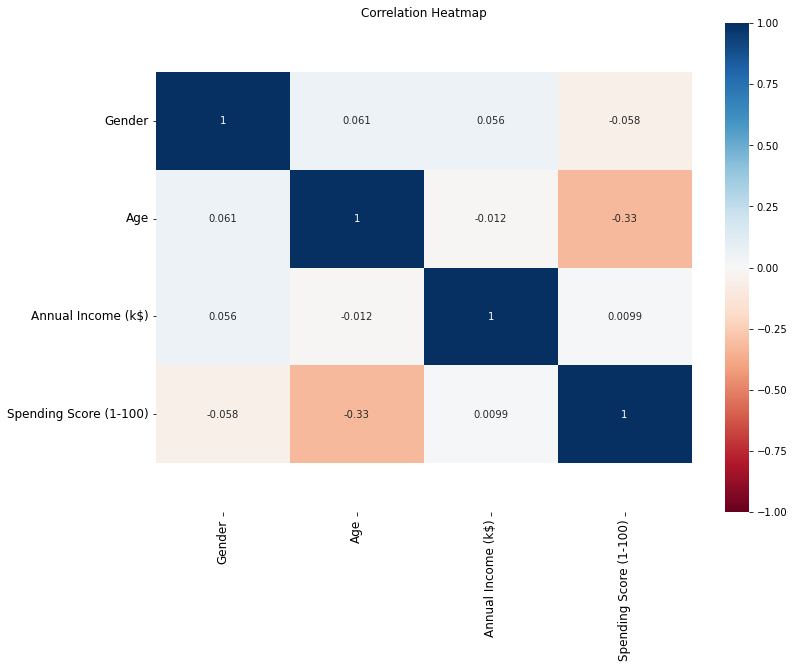

In [16]:
plt.figure(figsize = (12, 9))
s = sb.heatmap(df.corr(), annot = True, cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig("correlation.png",bbox_inches='tight')
plt.show()

- Spending Score and Age are most correlated, but negatively.

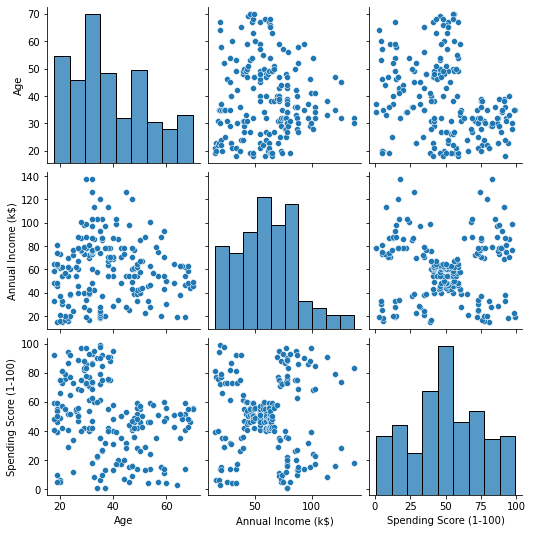

In [17]:
figure = sb.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
figure.savefig('distribution.png', dpi=400)

## Preprocessing
- Drop Gender since gender is not a continuous feature
- Standardize the data

In [18]:
# drop Gender
df.drop(['Gender'], axis=1, inplace=True)

# Feature Scaling: Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df)

## Conduct PCA to see the distribution in 2D to view potential clusters

In [19]:
from sklearn.decomposition import PCA

def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [20]:
pca, X_pca = do_pca(3, df_std)

In [21]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

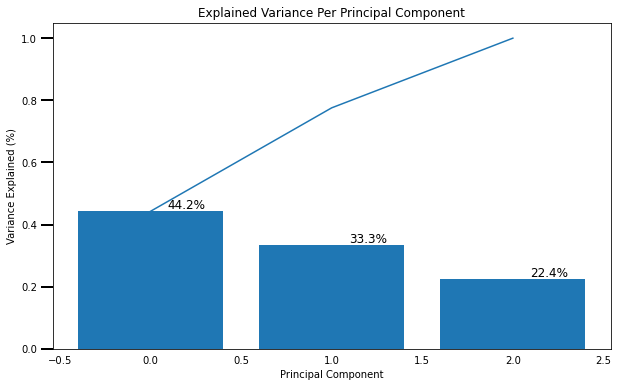

In [22]:
scree_plot(pca)

* In this graph, we can see if we use the PC1 and PC2 to plot the distribution, we'll only capture around 77.5% variance of the data.

In [23]:
pca, X_pca = do_pca(2, df_std)

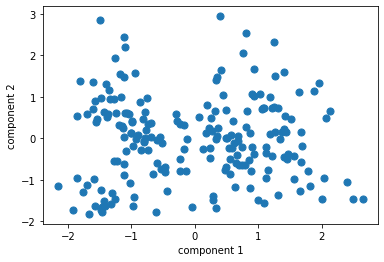

In [24]:
plt.scatter(X_pca[:,0], X_pca[:,1],  s = 50)
plt.xlabel('component 1')
plt.ylabel('component 2');

- It seems that there are 3 vague clusters, one is in the middle-left place, the second one is in the low-left place, and the third one is in the middle-right place.

## Choosing the right k

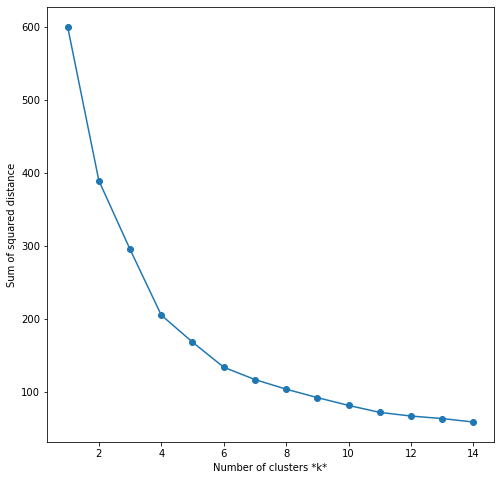

In [27]:
# using Elbow Method 

# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.savefig("elbow.png",bbox_inches='tight')


- Elbow Method doesn't show a super clear elbow here. Maybe using 4 to 6 would be good ideas, but to make sure choosing the best k, I decided to use Silhouette index to find the right k.

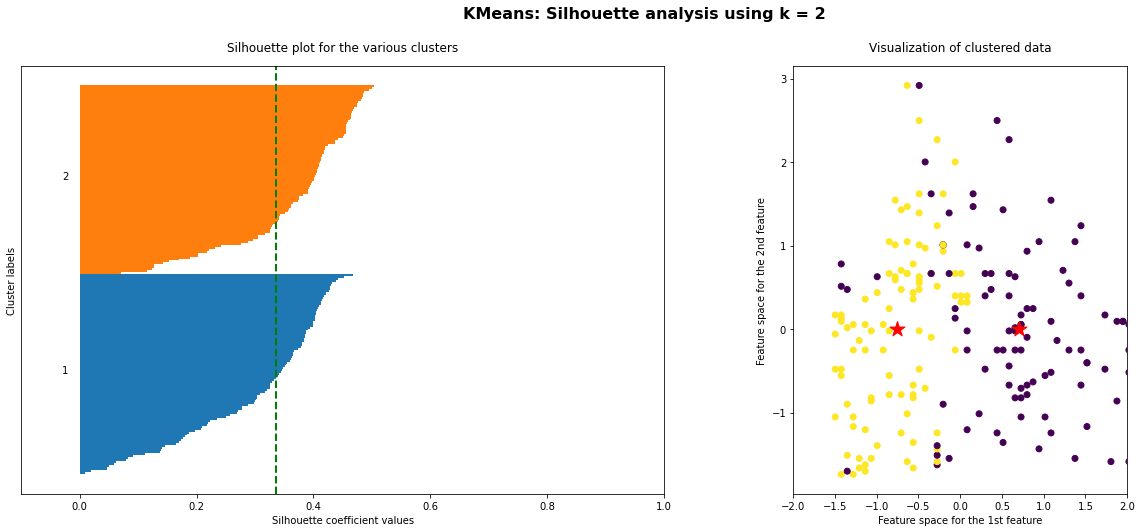

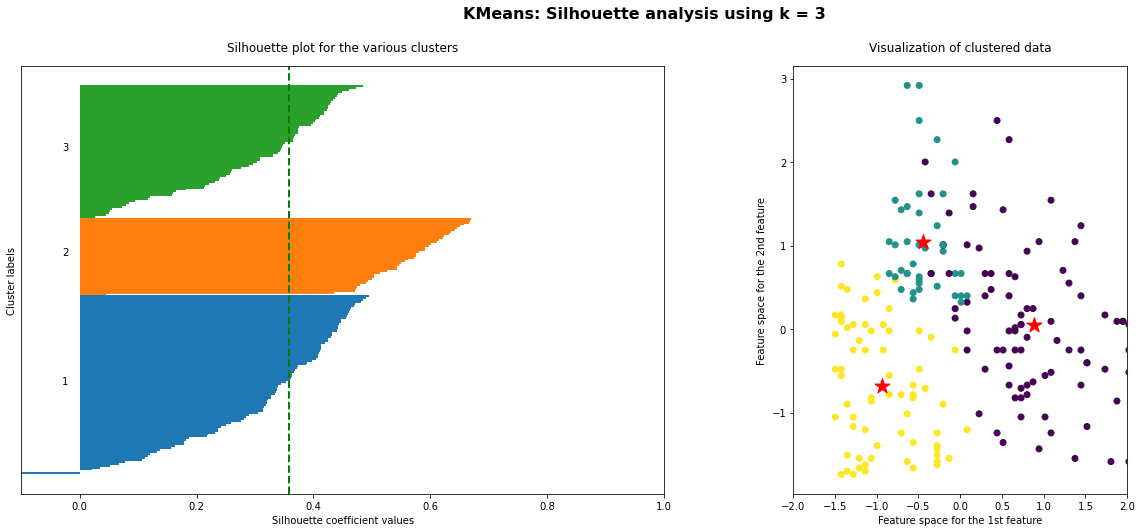

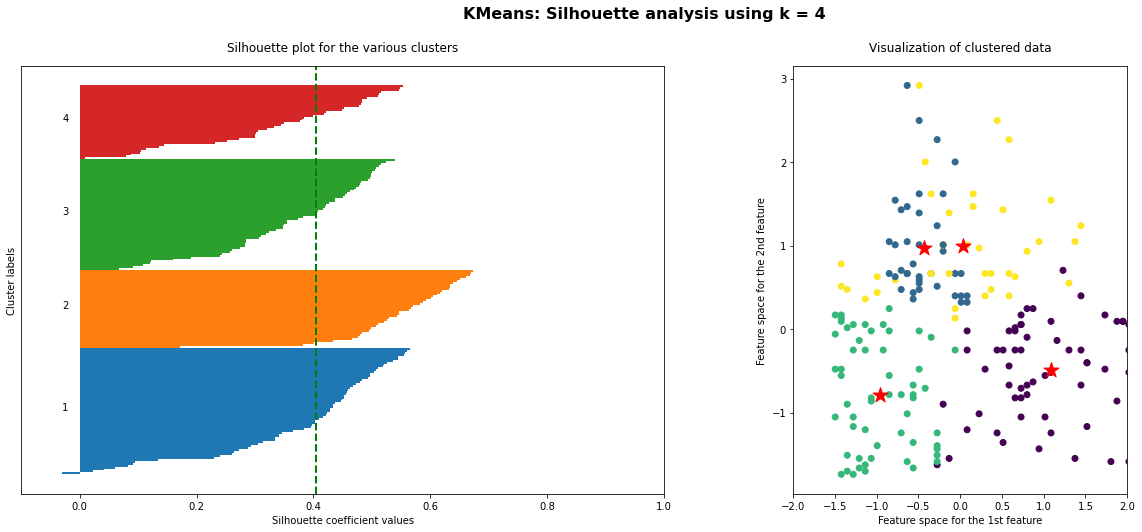

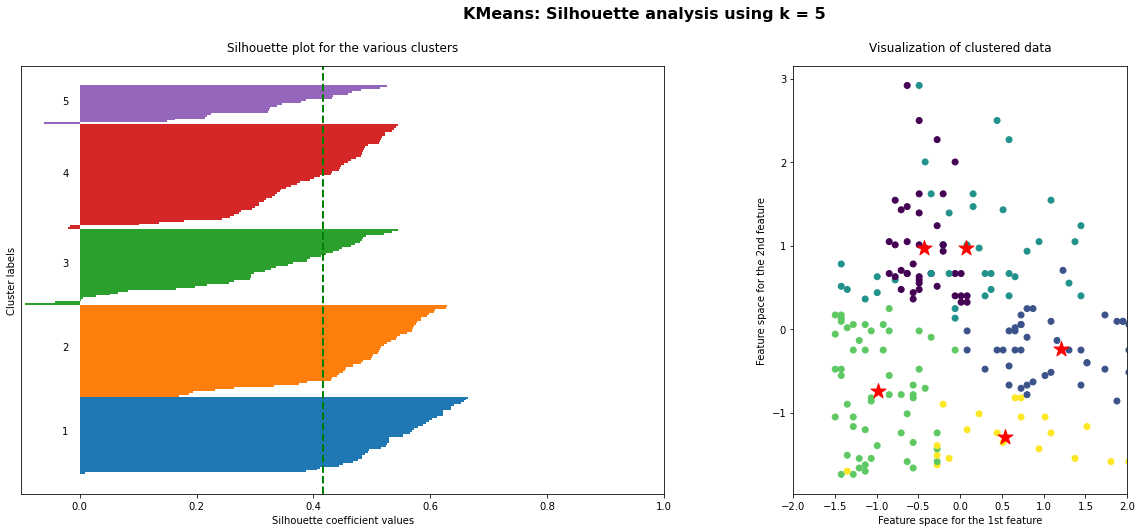

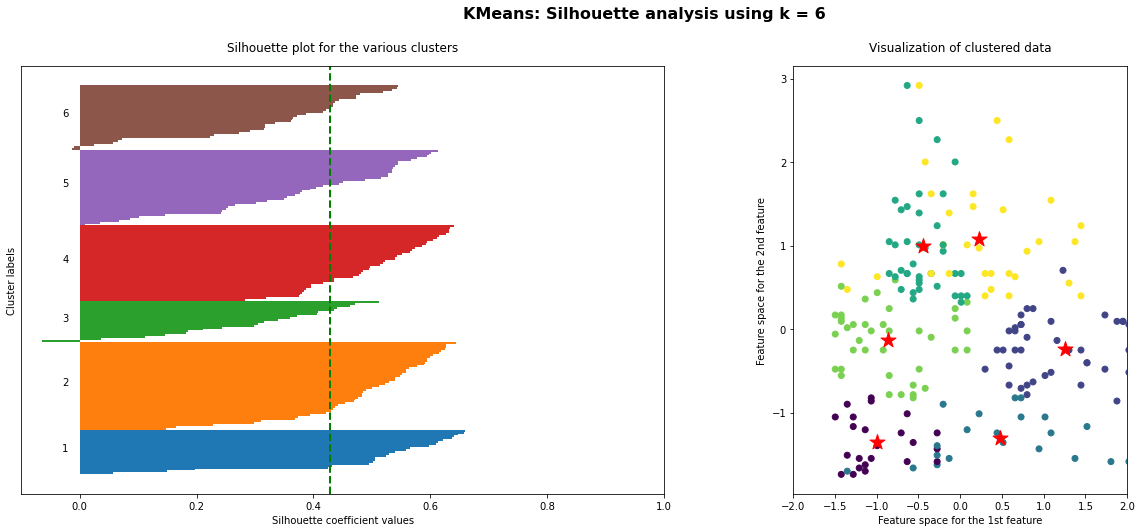

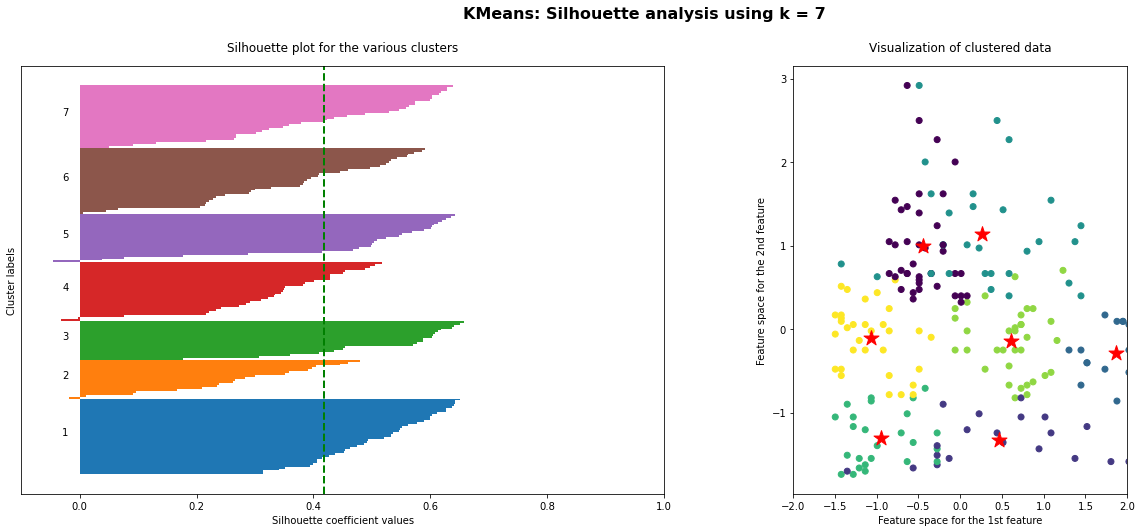

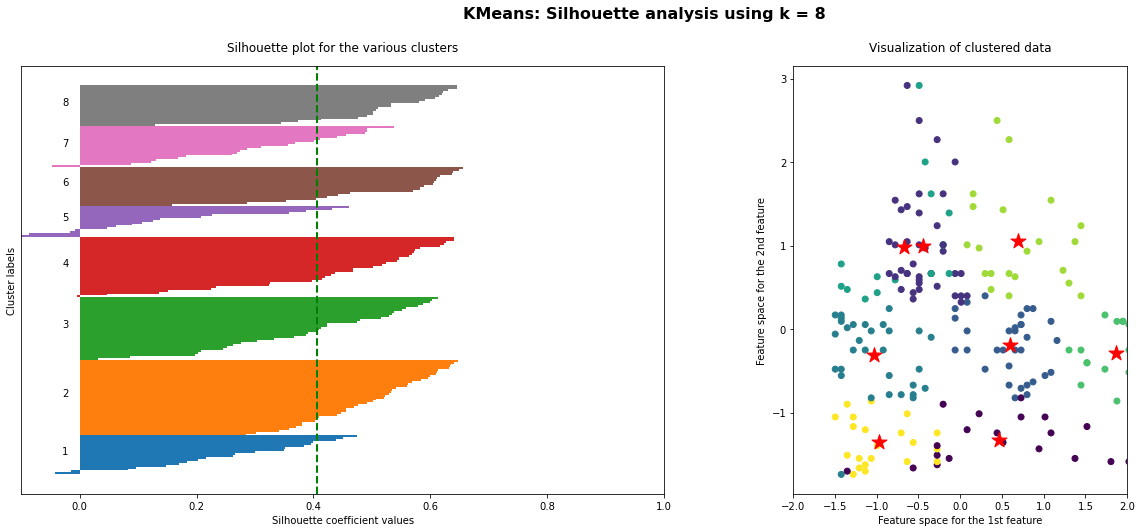

In [42]:
# Silhouette index method
from sklearn.datasets import (make_blobs,
                              make_circles,
                              make_moons)

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4, 5, 6, 7, 8]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df_std[:, 0], df_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'KMeans: Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

- After assessing Silhouette score, I found that k = 6 has the highest average Silhouette score, 0.42(see vertical green lines).

## Comparing with other clustering methods: Hierachical clustering and GMMs
- I will be using Silhouette index to validate the results, and Silhouette index method doesn't have the concept of noise, so I don't compare KMeans with DBSCAN here.

          KM        HC      GMMs   k
0   0.335472  0.317957  0.249660   2
1   0.357793  0.321489  0.340558   3
2   0.403958  0.361451  0.264121   4
3   0.416643  0.390028  0.406367   5
4   0.426855  0.420117  0.376684   6
5   0.421905  0.398295  0.388390   7
6   0.407638  0.366479  0.357413   8
7   0.421768  0.375385  0.362865   9
8   0.427401  0.380889  0.354228  10
9   0.411505  0.381198  0.325340  11
10  0.387148  0.353572  0.317608  12
11  0.397814  0.355790  0.287257  13
12  0.370280  0.353230  0.300182  14
13  0.348973  0.345435  0.323993  15


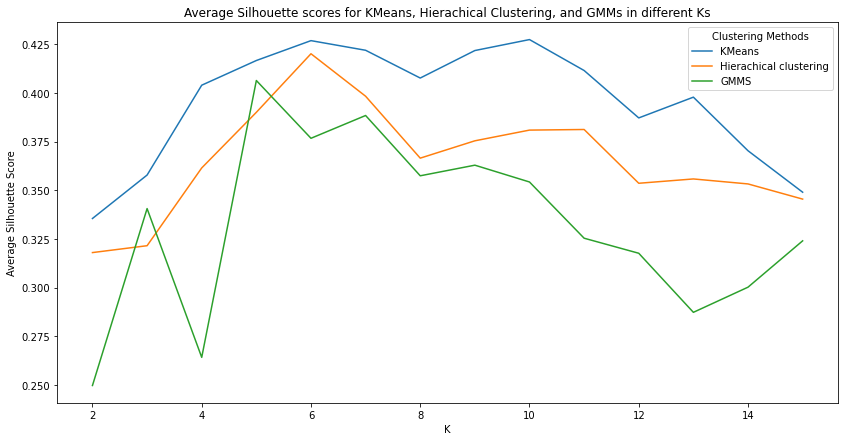

In [43]:
def plot_km_hc_gmms_in_different_ks(df_std, start_k, end_k):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    
    avg_silhouette_scores = []

    for k in range(start_k, end_k+1):

        # Run the KMeans algorithm
        km = KMeans(n_clusters=k)
        km_labels = km.fit_predict(df_std)

        # Run the Hierachical clustering algorithm
        hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(df_std)
        hc_labels = hc.labels_

        # Run the GMMs algorithm
        gm = GaussianMixture(covariance_type="spherical", n_components=k, random_state=0).fit(df_std)
        gm_labels = GaussianMixture(n_components=k, random_state=0).fit_predict(df_std)

        # calculate average silhouette scores
        km_silhouette_vals = silhouette_samples(df_std, km_labels)
        hc_silhouette_vals = silhouette_samples(df_std, hc_labels)
        gm_silhouette_vals = silhouette_samples(df_std, gm_labels)
        km_avg_score = np.mean(km_silhouette_vals)
        hc_avg_score = np.mean(hc_silhouette_vals)
        gm_avg_score = np.mean(gm_silhouette_vals)
        avg_silhouette_scores.append([km_avg_score, hc_avg_score, gm_avg_score])

    df_avg_silhouette_scores = pd.DataFrame(avg_silhouette_scores, columns = ['KM', 'HC', "GMMs"])
    df_avg_silhouette_scores["k"] = range(start_k, end_k+1)
    print(df_avg_silhouette_scores)
    
    # plot male and female left-handedness rates vs. age
    fig, ax = plt.subplots() # create figure and axis objects
    fig.set_size_inches(14, 7)
    ax.set_title('Average Silhouette scores for KMeans, Hierachical Clustering, and GMMs in different Ks')
    ax.plot('k', 'KM', data=df_avg_silhouette_scores) 
    ax.plot('k', 'HC', data=df_avg_silhouette_scores) 
    ax.plot('k', 'GMMs', data=df_avg_silhouette_scores) 
    ax.legend(['KMeans',"Hierachical clustering", "GMMS"], title="Clustering Methods") # add a legend
    ax.set_xlabel('K')
    ax.set_ylabel("Average Silhouette Score");
    
plot_km_hc_gmms_in_different_ks(df_std, 2, 15)

- KMeans performs best when k=6 and scores 0.428
- Hierachical clustering performs best when k=6 and scores 0.42
- GMMs performs best when k=5 and scores 0.406


## Conclusion of model choosing: KMeans with k=6

## Analyzing clustering results

In [44]:
# using kmeans with k=6
km = KMeans(n_clusters=6)
labels = km.fit_predict(df_std)

# reload data since we might want to use our customerID later
df = pd.read_csv('Supermarket_Customers.csv')
df['kmeans_label'] = labels

In [38]:
# calculate descriptive summaries
summary = df.groupby("kmeans_label")[['Age', 'Spending Score (1-100)']].mean()
summary['Median Annual Income(k)'] = df.groupby("kmeans_label")[['Annual Income (k$)']].median()
summary['Cnt'] = df.groupby('kmeans_label').CustomerID.count().values
summary['Male Cnt'] = df[df.Gender=="Male"].groupby("kmeans_label").CustomerID.count().values
summary['Female Cnt'] = df[df.Gender=="Female"].groupby("kmeans_label").CustomerID.count().values
summary['Male%'] = summary['Male Cnt']/summary['Cnt']
summary['Female%'] = summary['Female Cnt']/summary['Cnt']
summary.rename(columns={'Age':'Avg Age', "Spending Score (1-100)":'Avg Spending Score'}, inplace=True)

final_summary = summary[['Avg Age','Avg Spending Score',"Median Annual Income(k)","Cnt","Male%","Female%"]].sort_values(by='Avg Spending Score', ascending=False)
final_summary

,Avg Age,Avg Spending Score,Median Annual Income(k),Cnt,Male%,Female%
kmeans_label,,,,,,
3,32.692308,82.128205,79.0,39,0.461538,0.538462
5,25.000000,77.608696,24.0,23,0.434783,0.565217
4,27.000000,49.131579,59.5,38,0.342105,0.657895
2,56.333333,49.066667,54.0,45,0.422222,0.577778
0,45.523810,19.380952,25.0,21,0.380952,0.619048
1,41.264706,16.764706,85.5,34,0.588235,0.411765


## Name each cluster and create radar charts

- Group 5: High-income high-spending young age
- Group 3: Low-income high-spending young age
- Group 0: Middle-income mid-spending old age 
- Group 1: Middle-income mid-spending young age
- Group 2: Low-income low-spending middle age 
- Group 4: High-income low-spending middle age

In [39]:
temp = final_summary

# convert index to a column and then rename each group
temp.reset_index(level=0, inplace=True)
temp["kmeans_label"]=temp["kmeans_label"].map({5: 'High-income high-spending young age', 
                                 3: 'Low-income high-spending young age',
                                1: 'Middle-income mid-spending young age',
                                0: 'Middle-income mid-spending old age',
                                2:'Low-income low-spending middle age',
                                4: 'High-income low-spending middle age'})
temp.rename(columns={'kmeans_label':'group'}, inplace=True)
temp = temp.reindex(columns=['group', 'Avg Age', 'Avg Spending Score', 'Male%', 'Female%', 'Median Annual Income(k)',
       'Cnt'])

temp

,group,Avg Age,Avg Spending Score,Male%,Female%,Median Annual Income(k),Cnt
0,Low-income high-spending young age,32.692308,82.128205,0.461538,0.538462,79.0,39
1,High-income high-spending young age,25.000000,77.608696,0.434783,0.565217,24.0,23
2,High-income low-spending middle age,27.000000,49.131579,0.342105,0.657895,59.5,38
3,Low-income low-spending middle age,56.333333,49.066667,0.422222,0.577778,54.0,45
4,Middle-income mid-spending old age,45.523810,19.380952,0.380952,0.619048,25.0,21
5,Middle-income mid-spending young age,41.264706,16.764706,0.588235,0.411765,85.5,34


In [40]:
temp[['Male%']] = temp[['Male%']]*100
temp[['Female%']] = temp[['Female%']]*100

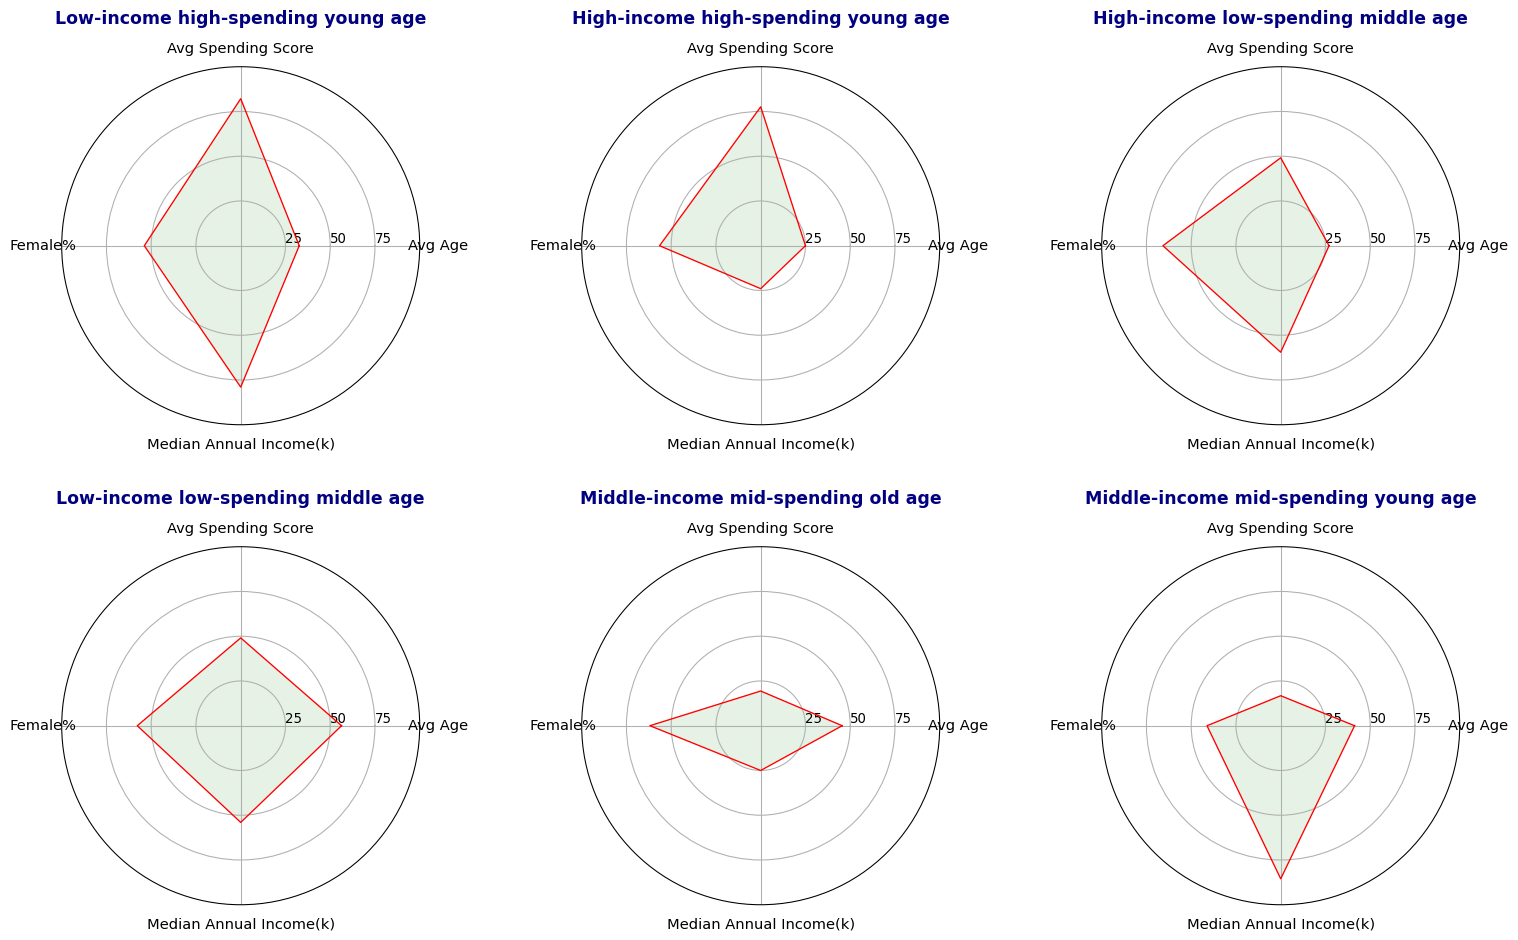

In [41]:
# create radar charts
def multiple_radars(df, columns, row):
    # Libraries
    from math import pi
    N = len(columns)
    columns_no_need = df[df.columns.difference(columns)]

    # But we need to repeat the first value to close the circular graph:
    values=df.loc[row].drop(columns_no_need).values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #plt.subplots_adjust(left=None, bottom=None, right=None, top=0.5, wspace=None, hspace=None)
    # Initialise the spider plot

    ax = plt.subplot(2, 3, row+1, polar=True) 

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], columns, size=11)
    plt.title(df.loc[row].group, size=13, y=1.1,fontweight="bold",  color='navy')
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], 
               ["25","50","75"], size=10)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, color='r', linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'g', alpha=0.1)


my_dpi=96
plt.figure(figsize=(1600/my_dpi, 1000/my_dpi), dpi=my_dpi)


# number of variable
columns=['Avg Age', 'Avg Spending Score', 'Female%', 'Median Annual Income(k)']
for i in range(0,6): 
    multiple_radars(temp, columns, i)
plt.tight_layout(pad=3.0)